# Лабораторная работа №1
### Дьячков Вадим, 33501/4

### Цели работы
1. Научиться реализвывать многослойный перцептрон (MLP)

### Инициализация окружения

In [1]:
%matplotlib inline
import numpy as np
import itertools
import seaborn as sns
from matplotlib import pyplot as plt

np.random.seed(42)
sns.set(font_scale=1.25)

BLUE = '#0074D9'
RED = '#FF4136'

## №1. Крестики-нолики

Разделим таблицу $4\times 4$ на крестики и нолики так, чтобы классы "O" (0) и "X" (1) были линейно неразделимы:

\begin{cases}
y = f(X)\\
X = [x_1, x_2]\\
x_i \in \{1, 2, 3, 4\}\\
y_i \in \{0, 1\}
\end{cases}

In [2]:
grid = np.array([[0 if np.random.random() > 0.5 else 1 for i in range(4)] for j in range(4)])
grid

array([[1, 0, 0, 0],
       [1, 1, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 1, 1]])

In [3]:
def fun(x):
    x = np.array(x)
    if len(x.shape) == 1:
        return grid[x[0] - 1, x[1] - 1]
    else:
        return np.array([fun(xi) for xi in x])[np.newaxis].T

In [4]:
fun(np.array([1, 2])), fun([4, 4])

(0, 1)

In [5]:
P = np.array(list(itertools.product([1, 2, 3, 4], repeat=2)))
T = fun(P)

print('x1 x2    y')
for i in range(len(P)):
    print(P[i], '->', T[i][0])

x1 x2    y
[1 1] -> 1
[1 2] -> 0
[1 3] -> 0
[1 4] -> 0
[2 1] -> 1
[2 2] -> 1
[2 3] -> 1
[2 4] -> 0
[3 1] -> 0
[3 2] -> 0
[3 3] -> 1
[3 4] -> 0
[4 1] -> 0
[4 2] -> 1
[4 3] -> 1
[4 4] -> 1


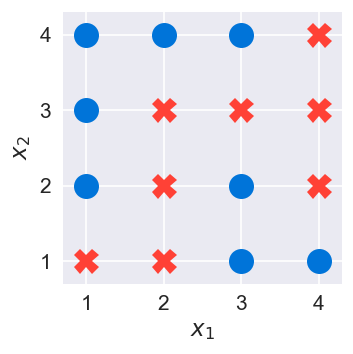

In [6]:
def draw_tic_tac_toe(X, Y, markersize=15):
    fig = plt.figure(figsize=(3, 3), dpi=120)
    for i in range(len(X)):
        x1, x2 = X[i]
        y = Y[i][0]
        m = 'X' if y == 1 else 'o'
        c = RED if y == 1 else BLUE
        plt.plot(x1, x2, m, markersize=markersize, color=c)
    plt.xticks([1, 2, 3, 4])
    plt.yticks([1, 2, 3, 4])
    plt.xlim([0.7, 4.3])
    plt.ylim([0.7, 4.3])
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    return fig
    
fig = draw_tic_tac_toe(P, T)
plt.show()

## Планирование MLP

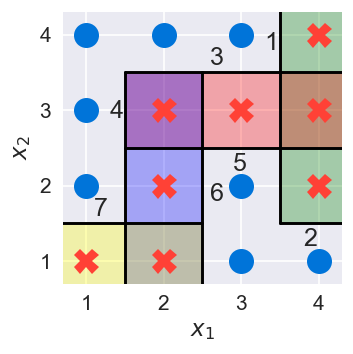

In [7]:
fig = draw_tic_tac_toe(P, T)
    
plt.plot([3.5, 3.5], [1.5, 5], c='k')
plt.text(3.3, 3.8, '1')

plt.plot([3.5, 5], [1.5, 1.5], c='k')
plt.text(3.8, 1.2, '2')

plt.plot([1.5, 5], [3.5, 3.5], c='k')
plt.text(2.6, 3.6, '3')

plt.plot([1.5, 1.5], [0, 3.5], c='k')
plt.text(1.3, 2.9, '4')

plt.plot([1.5, 5], [2.5, 2.5], c='k')
plt.text(2.9, 2.2, '5')

plt.plot([2.5, 2.5], [0, 3.5], c='k')
plt.text(2.6, 1.8, '6')

plt.plot([0, 2.5], [1.5, 1.5], c='k')
plt.text(1.1, 1.6, '7')

plt.fill_between([3.5, 5], 5, 1.5, facecolor='green', alpha=0.3)
plt.fill_between([1.5, 5], 3.5, 2.5, facecolor='red', alpha=0.3)
plt.fill_between([1.5, 2.5], 3.5, 0, facecolor='blue', alpha=0.3)
plt.fill_between([0, 2.5], 1.5, 0, facecolor='yellow', alpha=0.3)
plt.show()

<img src='scheme.png'>

4 выпуклые области, ограниченные прямыми:

$$
\begin{cases}
>1\\
>2
\end{cases}
\hspace{1cm}
\begin{cases}
<3\\
>4\\
>5
\end{cases}
\hspace{1cm}
\begin{cases}
<3\\
>4\\
<6
\end{cases}
\hspace{1cm}
\begin{cases}
<6\\
<7
\end{cases}
$$

### Первый слой:

1: $x_1 - 3.5 = 0 \rightarrow y_{11}$

2: $x_2 - 1.5 = 0 \rightarrow y_{12}$

3: $-x_2 + 3.5 = 0 \rightarrow y_{13}$

4: $x_1 - 1.5 = 0 \rightarrow y_{14}$

5: $x_2 - 2.5 = 0 \rightarrow y_{15}$

6: $-x_1 + 2.5 = 0 \rightarrow y_{16}$

7: $-x_2 + 1.5 = 0 \rightarrow y_{17}$

In [8]:
W01 = np.array([[1, 0, -3.5],
                [0, 1, -1.5],
                [0, -1, 3.5],
                [1, 0, -1.5],
                [0, 1, -2.5],
                [-1, 0, 2.5],
                [0, -1, 1.5]])

### Второй слой:

1: $y_{11} + y_{12} - 1.5 = 0 \rightarrow y_{21}$

2: $y_{13} + y_{14} + y_{15} - 2.5 = 0 \rightarrow y_{22}$

3: $y_{13} + y_{14} + y_{16} - 2.5 = 0 \rightarrow y_{23}$

4: $y_{16} + y_{17} - 1.5 = 0 \rightarrow y_{24}$

In [9]:
W12 = np.array([[1, 1, 0, 0, 0, 0, 0, -1.5],
                [0, 0, 1, 1, 1, 0, 0, -2.5],
                [0, 0, 1, 1, 0, 1, 0, -2.5],
                [0, 0, 0, 0, 0, 1, 1, -1.5]])

### Третий слой:

1: $y = y_{21} + y_{22} + y_{23} + y_{24} - 0.5$

In [10]:
W23 = np.array([1, 1, 1, 1, -0.5])

## Реализация

### На коленке

In [11]:
def predict(X):
    X = np.array(X)
    if len(X.shape) == 1:
        X01 = X[np.newaxis].T
        X01 = np.append(X01, [[1]], axis=0)  # add bias

        A1 = W01.dot(X01)  # activations of first layer
        X12 = np.where(A1 > 0, 1, 0)
        X12 = np.append(X12, [[1]], axis=0)

        A2 = W12.dot(X12)
        X23 = np.where(A2 > 0, 1, 0)
        X23 = np.append(X23, [[1]], axis=0)

        return 1 if W23.dot(X23) > 0 else 0
    else:
        return np.array([predict(Xi) for Xi in X])[np.newaxis].T

In [12]:
Y = predict(P)
np.equal(T, Y)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]], dtype=bool)

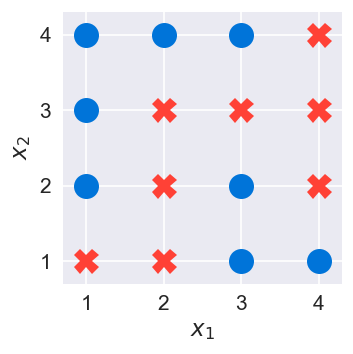

In [13]:
draw_tic_tac_toe(P, Y)
plt.show()

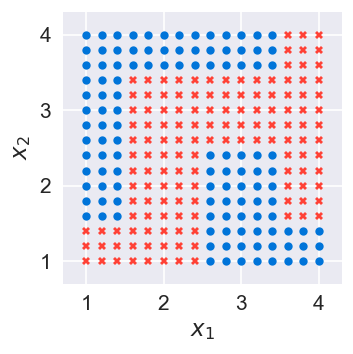

In [14]:
t = np.linspace(1, 4, 16)
P_big = np.array(list(itertools.product(t, t)))
Y_big = predict(P_big)
draw_tic_tac_toe(P_big, Y_big, 5)
plt.show()

Можно заметить, что все 16 точек (и не только они) классифицированы верно.

### На keras

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import plot_model
from keras.backend import sigmoid

def binary_activation(x):
    return sigmoid(100000 * x)

def set_weights(model, W01, W12, W23):
    W = [
        W01.T[0:-1],  # weights of 1st layer
        W01.T[-1],  # bias of 1st layer
        W12.T[0:-1],
        W12.T[-1],
        W23[np.newaxis].T[0:-1],
        W23[np.newaxis].T[-1]
    ]
    model.set_weights(W)

model = Sequential()

model.add(Dense(7, input_shape=(2,), activation=binary_activation, name='Lines'))
model.add(Dense(4, activation=binary_activation, name='Convex_figures'))
model.add(Dense(1, activation=binary_activation, name='Any_figure'))

model.compile(loss='mean_squared_error',
              optimizer='SGD',
              metrics=['binary_accuracy'])

set_weights(model, W01, W12, W23)

plot_model(model, to_file='model.png')

Using TensorFlow backend.


In [16]:
Y = model.predict(P)
np.equal(T, Y)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]], dtype=bool)

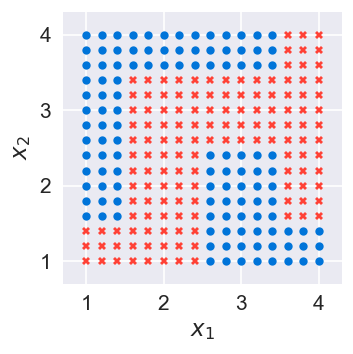

In [17]:
draw_tic_tac_toe(P_big, Y_big, 5)
plt.show()

Можно заметить, что все 16 точек (и не только они) классифицированы верно.